In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Loading

In [83]:
df = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


# Data Cleaning + Outliers


In [4]:
df.isnull().sum()
# df = df.drop(['id'], axis=1)
df.shape

(750000, 18)

['duration', 'month', 'pdays', 'poutcome', 'age', 'contact', 'default', 'previous', 'marital', 'housing', 'balance', 'campaign', 'education', 'loan', 'day']


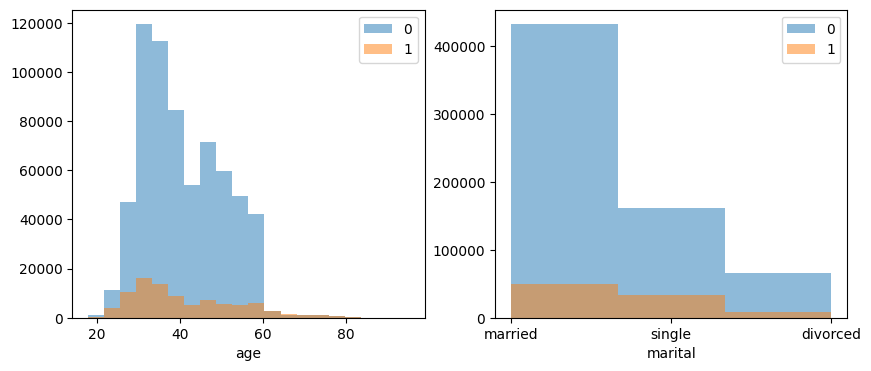

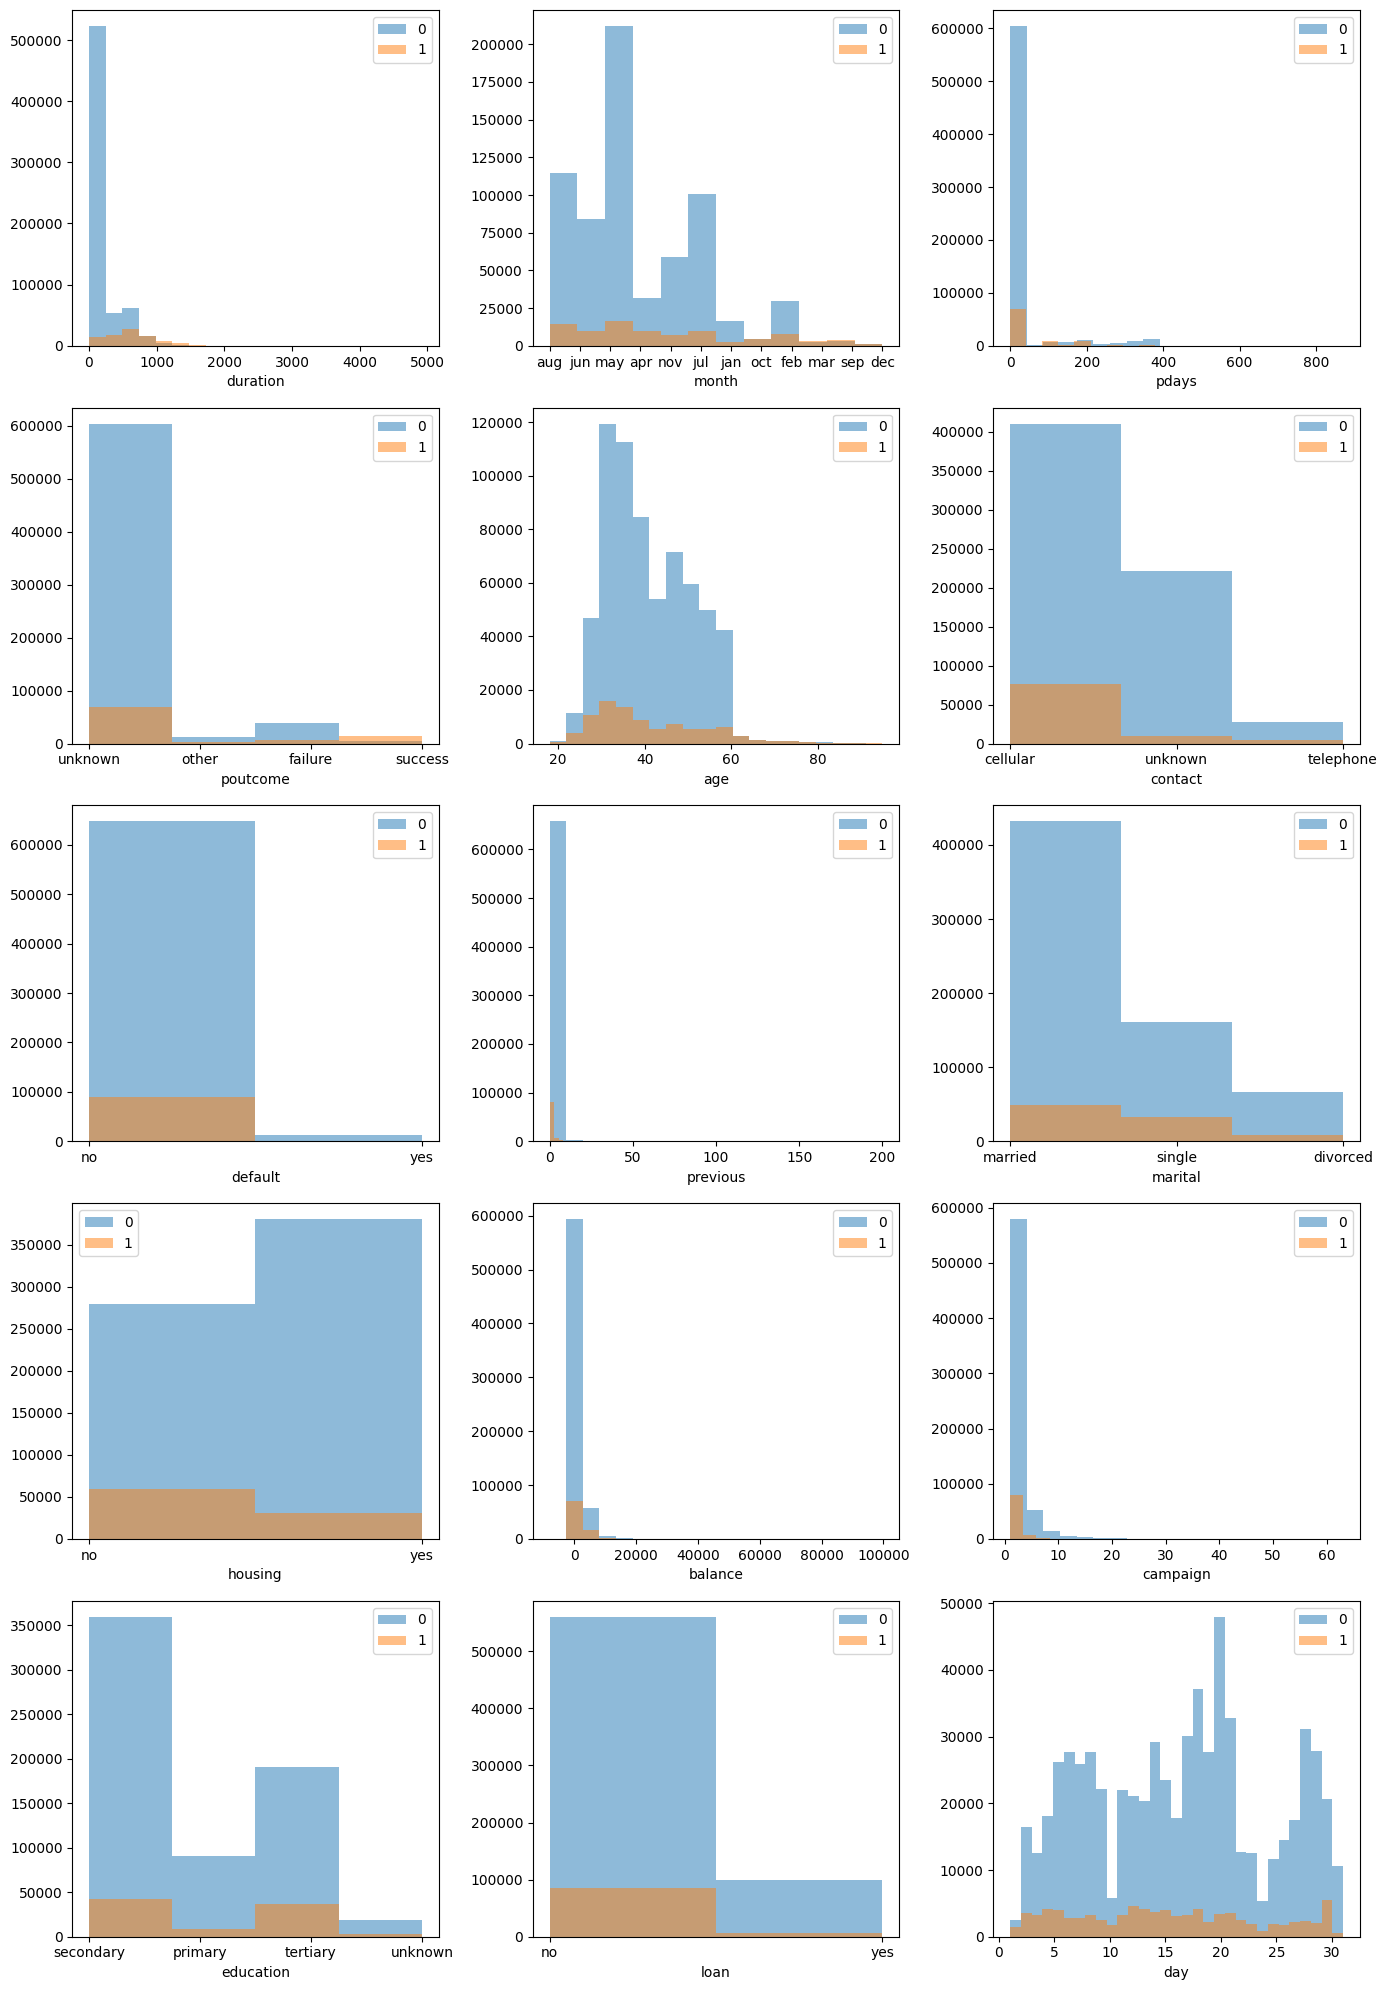

In [5]:
import matplotlib.pyplot as plt

categories = df['y'].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

for cat in categories:
    subset_age = df[df['y'] == cat]['age']
    subset_marital = df[df['y'] == cat]['marital']
    ax1.hist(subset_age, bins=20, alpha=0.5, label=str(cat))
    ax2.hist(subset_marital, bins=3, alpha=0.5, label=str(cat))

ax1.set_xlabel('age')
ax1.legend()
ax2.set_xlabel('marital')
ax2.legend()

# loop through all features
# get the num of classes per feature and make that equal to the bin size in histogram

import matplotlib.pyplot as plt

# Features excluding target column
features = list(set(df.columns) - {'y', 'id', 'job'})
print(features)

categories = df['y'].unique()

# Number of subplots
num_cols = 3
num_rows = (len(features) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axes = axes.flatten()  # flatten so we can index easily

for idx, feature in enumerate(features):
    ax = axes[idx]

    # Decide bin count
    if feature in ['balance', 'age', 'duration', 'pdays', 'id', 'previous', 'campaign']:
        bins = 20
    else:
        bins = df[feature].nunique()

    for cat in categories:
        subset = df[df['y'] == cat][feature]
        ax.hist(subset, bins=bins, alpha=0.5, label=str(cat))

    ax.set_xlabel(feature)
    ax.legend()

# Hide any unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




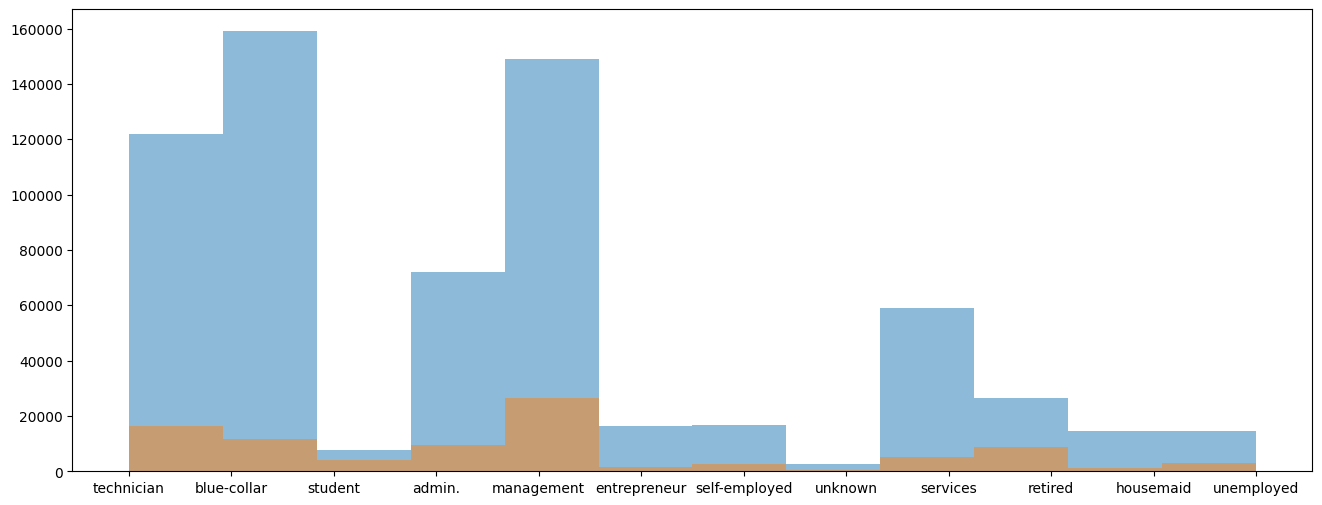

In [6]:

categories = df['y'].unique()
bins = df['job'].nunique()

fig, ax = plt.subplots(figsize=(16,6))

for c in categories:
    subset = df[df['y']==c]['job']
    ax.hist(subset, bins=bins, alpha=0.5, label=str(c))


# Feature Engineering


In [84]:
from sklearn.preprocessing import LabelEncoder


def data_process(df, remove_rows):

    # check types of jobs and count, need to account for the unknowns somehow, for now drop?
    df['job'].value_counts()
    mask = (df['job'] == 'unknown')
    if remove_rows:
        df = df[~mask]
    else:
        df.loc[mask, 'job'] = None

    df2 = df.copy()

    # education check, unknowns present, maybe can infer job through education level later on?
    def education_level(x):
        if str(x) == 'primary':
            return 1
        elif str(x) == 'secondary':
            return 2
        elif str(x) == 'tertiary':
            return 3
        return 0

    df3 = df2.copy()
    df3['education'] = df2['education'].apply(education_level)

    le = LabelEncoder()
    columns_encode = ['default', 'housing', 'loan']

    for col in columns_encode:
        df3[col] = le.fit_transform(df3[col])

    df4 = df3.copy()

    # student, can't be primary as a student
    mask = ((df3['job'] == 'student') & (df4['education'].dropna().astype(int) <= 1))
    if remove_rows:
        df4 = df4[~mask]
    else:
        df4.loc[mask, 'education'] = None

    # can't be retired and below 40 like what?
    mask = (df4["job"] == "retired") & (df4["age"] < 60)
    if remove_rows:
        df4 = df4[~mask]
    else:
        df4.loc[mask, "job"] = None

    # I mean if you are over 70 you are not doing labor or housemaid jobs anymore
    mask = (df4['age'] > 80) & (~df4['job'].isin(['retired']))
    if remove_rows:
        df4 = df4[~mask]
    else:
        df4.loc[mask, "job"] = 'Retired'

    # # older than 40, questionale student i think
    mask = (df4['age'] > 30) & (df4['job'].isin(['student']))
    if remove_rows:
        df4 = df4[~mask]
    else:
        df4.loc[mask, 'job'] = None

    # balance 0 or negative but signed up??? how
    if remove_rows:
        mask = ((df4['balance'] <= 0) & (df['y']==1))
        df4 = df4[~mask]

    
    job_income_dict = {
        'admin.': 2,
        'blue-collar': 1,
        'entrepreneur': 2,
        'housemaid': 1,
        'management': 3,
        'retired': 3,
        'self-employed': 3,
        'services': 1,
        'student': 1,
        'technician': 3,
        'unemployed': 1
    }

    df4['income_level'] = df4['job'].map(job_income_dict)

    # 2 is married
    df4['is_married'] = df4['marital'] == 'married'

    # 3 highly educated
    df4['is_highly_educated'] = df4['education'] == 3

    # 4 average salar is normal for age an occupation, if not then remove?
    AGE_BINS = [17, 28, 40, 50, 70, 100]
    df4['ageBin'] = pd.cut(
        df['age'],
        bins=AGE_BINS,
        labels=['Young Adult', 'Adult', 'Older Adult', 'Senior', 'OAP'],
        right=True
    ).astype(str)

    # 5 contacted before?
    df4['never_contacted_before'] = df4['pdays'] == -1

    #combine some features
    df4['married_young_adult'] = (df4['is_married']==True) & (df4['ageBin']=='Young Adult')
    df4['single_adult_lowbalance'] = (df4['is_married']==False) & (df4['ageBin'].isin(['Young Adult', 'Adult'])) & (df4['balance'] < df4['balance'].mean())

    df4['successb4_Adult_nohouse_married'] = (df4['is_married']==True) & (df4['ageBin'].isin(['Adult'])) & (df4['housing'] == 0) & (df['poutcome']=='success')

    def remove_balance_outliers(df):
        df_out = pd.DataFrame()
        for key, subdf in df4.groupby(['ageBin', 'job']):
            m = np.mean(subdf.balance)
            std = np.std(subdf.balance)
            reduced_df = subdf[(subdf.balance > (m-(std*2))) & (subdf.balance <= (m+(std*2)))]
            df_out = pd.concat([df_out, reduced_df], ignore_index=True)
        
        return df_out

    if remove_rows:
        df5 = df4.copy()
        return remove_balance_outliers(df5)
    else: 
        return df4

train_process = data_process(df, remove_rows=True)
test_process = data_process(df_test, remove_rows=False)

C:\Users\bekim\AppData\Local\Temp\ipykernel_534880\1186743591.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df4[~mask]


# Preprocessing

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import category_encoders as ce

categorical_columns = train_process.select_dtypes(['object', 'bool', 'category']).columns.to_list()
numerical_columns = train_process.select_dtypes('int64').columns.to_list()
numerical_columns = list(set(numerical_columns)-set(['y']))

high_card_cols = [c for c in categorical_columns if train_process[c].nunique(dropna=True) >= 5]
low_card_cols  = [c for c in categorical_columns if train_process[c].nunique(dropna=True) < 5]

low_card_cat_transformer = Pipeline(steps=[
    ('oneHot', OneHotEncoder(handle_unknown='ignore'))
])

high_card_cat_transformer = Pipeline([
    ("target_enc", ce.TargetEncoder(
        cols=high_card_cols,
        smoothing=10.0,
        min_samples_leaf=50
    ))
])

num_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("lowc", low_card_cat_transformer, low_card_cols),
    ("highc", high_card_cat_transformer, high_card_cols),
    ('num', num_transformer, numerical_columns)
])

X = train_process[numerical_columns + categorical_columns]
y = train_process['y']

# X_array = preprocessor.fit_transform(
#     train_process[numerical_columns + categorical_columns], 
#     train_process['y']
# )


# feature_names = preprocessor.get_feature_names_out()

# X = pd.DataFrame(X_array, columns=feature_names, index=train_process.index)
# y = train_process['y']

# X_test_array = preprocessor.transform(test_process[numerical_columns + categorical_columns])
# X_test = pd.DataFrame(X_test_array, columns=feature_names, index=test_process.index)



# Model Building


In [ ]:
# import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score

# n_splits = 5
# kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# y_probs = np.zeros(len(X_test))
# models = []
# val_aucs = []

# for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
#     print(f"Training fold {fold + 1}/{n_splits} >>>")
#     X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
#     X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
#     model = lgb.LGBMClassifier(
#         objective="binary",
#         metric="auc",
#         n_estimators=20000,
#         learning_rate=0.05,
#         num_leaves=120,
#         max_depth=14,
#         min_child_samples=8,
#         subsample=0.923,
#         colsample_bytree=0.3,
#         reg_alpha=1.24,
#         reg_lambda=1.28,
#         max_bin=4500,
#         random_state=42,
#         verbosity=-1
#     )
    
#     model.fit(
#         X_train, y_train,
#         eval_set=[(X_val, y_val)],
#         eval_metric='auc',
#         callbacks=[
#             lgb.early_stopping(500),
#             lgb.log_evaluation(period=500)
#         ]
#     )
    
#     models.append(model)
    
#     # Average predictions across all folds
#     y_probs += model.predict_proba(X_test)[:, 1] / n_splits

#     # Val AUC
#     val_pred = model.predict_proba(X_val)[:, 1]
#     val_auc = roc_auc_score(y_val, val_pred)
#     val_aucs.append(val_auc)

# print(f"Mean AUC: {np.mean(val_aucs):.6f}")

Training fold 1/5 >>>
Training until validation scores don't improve for 500 rounds
[500]	valid_0's auc: 0.973293
[1000]	valid_0's auc: 0.974343
[1500]	valid_0's auc: 0.974629
[2000]	valid_0's auc: 0.974655
[2500]	valid_0's auc: 0.974624
Early stopping, best iteration is:
[2225]	valid_0's auc: 0.974663
Training fold 2/5 >>>
Training until validation scores don't improve for 500 rounds
[500]	valid_0's auc: 0.973553
[1000]	valid_0's auc: 0.974669
[1500]	valid_0's auc: 0.974932
[2000]	valid_0's auc: 0.97499
[2500]	valid_0's auc: 0.974987
Early stopping, best iteration is:
[2293]	valid_0's auc: 0.975016
Training fold 3/5 >>>
Training until validation scores don't improve for 500 rounds
[500]	valid_0's auc: 0.97298
[1000]	valid_0's auc: 0.974176
[1500]	valid_0's auc: 0.974544
[2000]	valid_0's auc: 0.974608
[2500]	valid_0's auc: 0.974594
Early stopping, best iteration is:
[2173]	valid_0's auc: 0.974637
Training fold 4/5 >>>
Training until validation scores don't improve for 500 rounds
[500]	

# Model Evaluation

In [10]:
# import matplotlib.pyplot as plt

# preprocessor = bank_pipeline.named_steps['preprocess']
# model = bank_pipeline.named_steps['model']

# features = preprocessor.get_feature_names_out()
# importances = model.feature_importances_

# importance_df = pd.DataFrame(
#     {
#         'feature': features,
#         'importance': model.feature_importances_
#     }
# ).sort_values(by='importance', ascending=False).head(40)

# plt.figure(figsize=(8,6))
# plt.barh(importance_df['feature'], importance_df['importance'])
# plt.title("Top 15 Importances")
# plt.tight_layout()
# plt.show()


# Model Submission

In [ ]:

# submission = pd.DataFrame({"id": df_test["id"], "y": y_probs})
# submission.to_csv("submission_competition.csv", index=False)
# submission.head()

,id,y
0,750000,1.106447e-03
1,750001,8.207800e-02
2,750002,8.586166e-05
3,750003,9.302799e-08
4,750004,2.830342e-02


In [36]:
import joblib
import lightgbm as lgb

best_iters = [m.best_iteration_ for m in models]
final_n_estimators = int(np.mean(best_iters))
print("Best iters per fold:", best_iters)
print("Using final_n_estimators =", final_n_estimators)

final_model_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', lgb.LGBMClassifier(
    objective="binary",
    metric="auc",
    n_estimators=final_n_estimators,
    learning_rate=0.05,
    num_leaves=120,
    max_depth=14,
    min_child_samples=8,
    subsample=0.923,
    colsample_bytree=0.3,
    reg_alpha=1.24,
    reg_lambda=1.28,
    max_bin=4500,
    random_state=42,
    verbosity=-1
))
])


# final_model = lgb.LGBMClassifier(
#     objective="binary",
#     metric="auc",
#     n_estimators=final_n_estimators,
#     learning_rate=0.05,
#     num_leaves=120,
#     max_depth=14,
#     min_child_samples=8,
#     subsample=0.923,
#     colsample_bytree=0.3,
#     reg_alpha=1.24,
#     reg_lambda=1.28,
#     max_bin=4500,
#     random_state=42,
#     verbosity=-1
# )

final_model_pipeline.fit(X, y)
# y_test_probs = final_model_pipeline.predict_proba(X_test)[:, 1]
# submission = pd.DataFrame({"id": df_test["id"], "y": y_test_probs})
# submission.to_csv("submission.csv", index=False)
# submission.head()


joblib.dump(final_model_pipeline, 'model.joblib')



Best iters per fold: [2225, 2293, 2173, 2096, 1844]
Using final_n_estimators = 2126


['model.joblib']

In [80]:
sample1 = {
    "id": 101,
    "age": 45,
    "job": "management",
    "marital": "married",
    "education": "tertiary",
    "default": "no",
    "balance": 1200,
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "day": 15,
    "month": "may",
    "duration": 210,
    "campaign": 2,
    "pdays": -1,
    "previous": 0,
    "poutcome": "unknown"
}

sample2 = {
    "id": 102,
    "age": 28,
    "job": "management",
    "marital": "single",
    "education": "secondary",
    "default": "no",
    "balance": 1000,
    "housing": "no",
    "loan": "no",
    "contact": "telephone",
    "day": 28,
    "month": "jun",
    "duration": 95,
    "campaign": 1,
    "pdays": 100,
    "previous": 0,
    "poutcome": "success"
}

sample3 = {
    "id": 103,
    "age": 52,
    "job": "technician",
    "marital": "divorced",
    "education": "secondary",
    "default": "no",
    "balance": 2450,
    "housing": "yes",
    "loan": "yes",
    "contact": "cellular",
    "day": 23,
    "month": "jul",
    "duration": 360,
    "campaign": 4,
    "pdays": 120,
    "previous": 2,
    "poutcome": "success"
}


In [81]:

df_predict_time = pd.DataFrame([sample2])
df_predict_time

prediction = final_model_pipeline.predict_proba(
    data_process(df_predict_time, remove_rows=False))[:,1][0]

percentage = f"{str(round(prediction*100, 1))}%"
percentage



'17.9%'